### Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

### Loading the dataset

In [3]:
iris_data = pd.read_csv('IRIS.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Getting information from data

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


**Observations** <br>
1.No columns has any Null Entries <br>
2.Four columns are numerical type (float64) <br>
3.Only Single column categorical type (object) <br>

### Getting statistical distribution info

In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:** <br>  
For columns sepal_length, sepal_width, petal_length and petal_width repectively,<br>
1. Mean values= 5.843333	3.054000	3.758667	1.198667 <br>
2. Standard deviation = 0.828066	0.433594	1.764420	0.763161 <br>
3. Minimum value = 4.300000	2.000000	1.000000	0.100000  <br>
4. Maximum value = 7.900000	4.400000	6.900000	2.500000 <br>

### Checking For Duplicate Entries

In [6]:
iris_data.duplicated().sum()  # Total no of duplicated entries

3

In [7]:
iris_data[iris_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Due to three duplicate values, the balance of each species must be checked

### Balance Check

In [8]:
iris_data['species'].value_counts()  # Gives number of entries of all species

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

The data is balanced, which leads to the conclusion of not deleting duplicate values. Deleting values would cause imbalance in the data and lead to incorecct predictions

### Visualizing data analysis

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species sample count'}, xlabel='species', ylabel='count'>

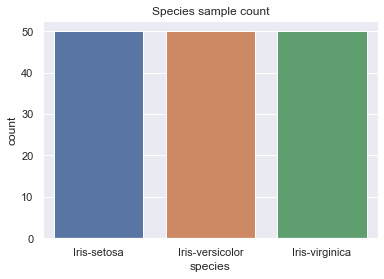

In [9]:
plt.title('Species sample count')
sns.countplot(iris_data['species'])

**Observations:** <br> 
1. This further confirms the fact that data is well balanced <br>
2. Each species ( Iris virginica,setosa,versicolor) has 50 samples <br>    

## Uni-variate Analysis

### Comparison between various species based on sepal length and width

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on sapel length and width'}, xlabel='sepal_length', ylabel='sepal_width'>

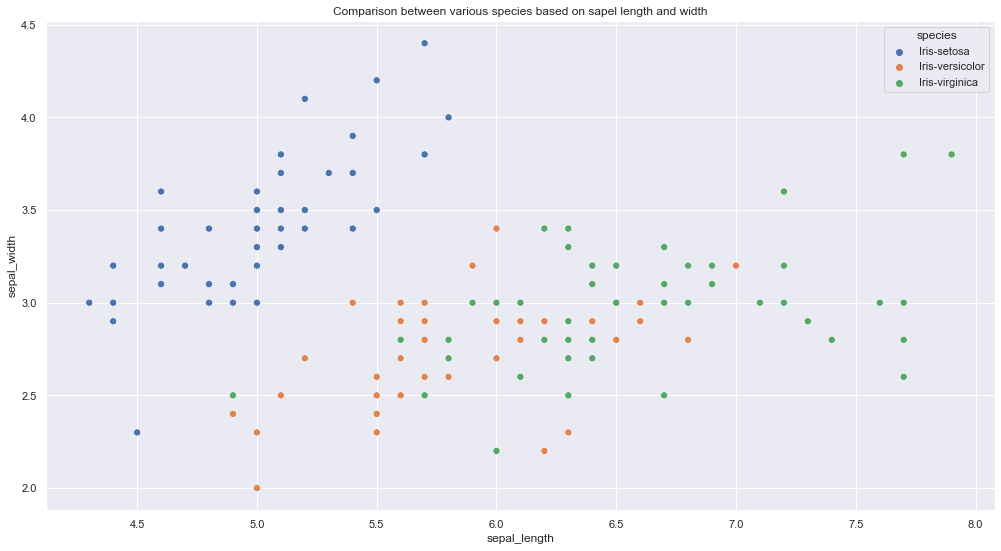

In [10]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(iris_data['sepal_length'],iris_data['sepal_width'],hue =iris_data['species'],s=50)


**Observations:** <br>
1. Iris-setosa species has smaller sepal length but higher width. <br>
2. Versicolor lies in almost middle for length as well as width <br>
3. Virginica has larger sepal lengths and smaller sepal widths <br>

### Comparison between various species based on sapel lenght and width

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on sapel lenght and width'}, xlabel='petal_length', ylabel='petal_width'>

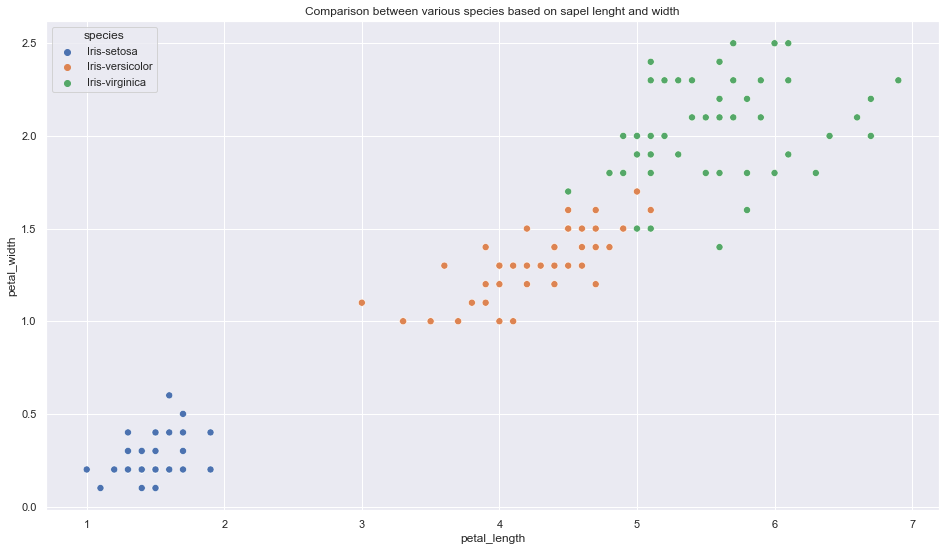

In [11]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on sapel lenght and width')
sns.scatterplot(iris_data['petal_length'], iris_data['petal_width'], hue = iris_data['species'], s= 50)

 **Observations:**
 1. Setosa species have the smallest petal length as well as petal width <br>
 2. Versicolor species have average petal length and petal width <br>
 3. Virginica species have the highest petal length as well as petal width <br>

## Bi-variate Analysis

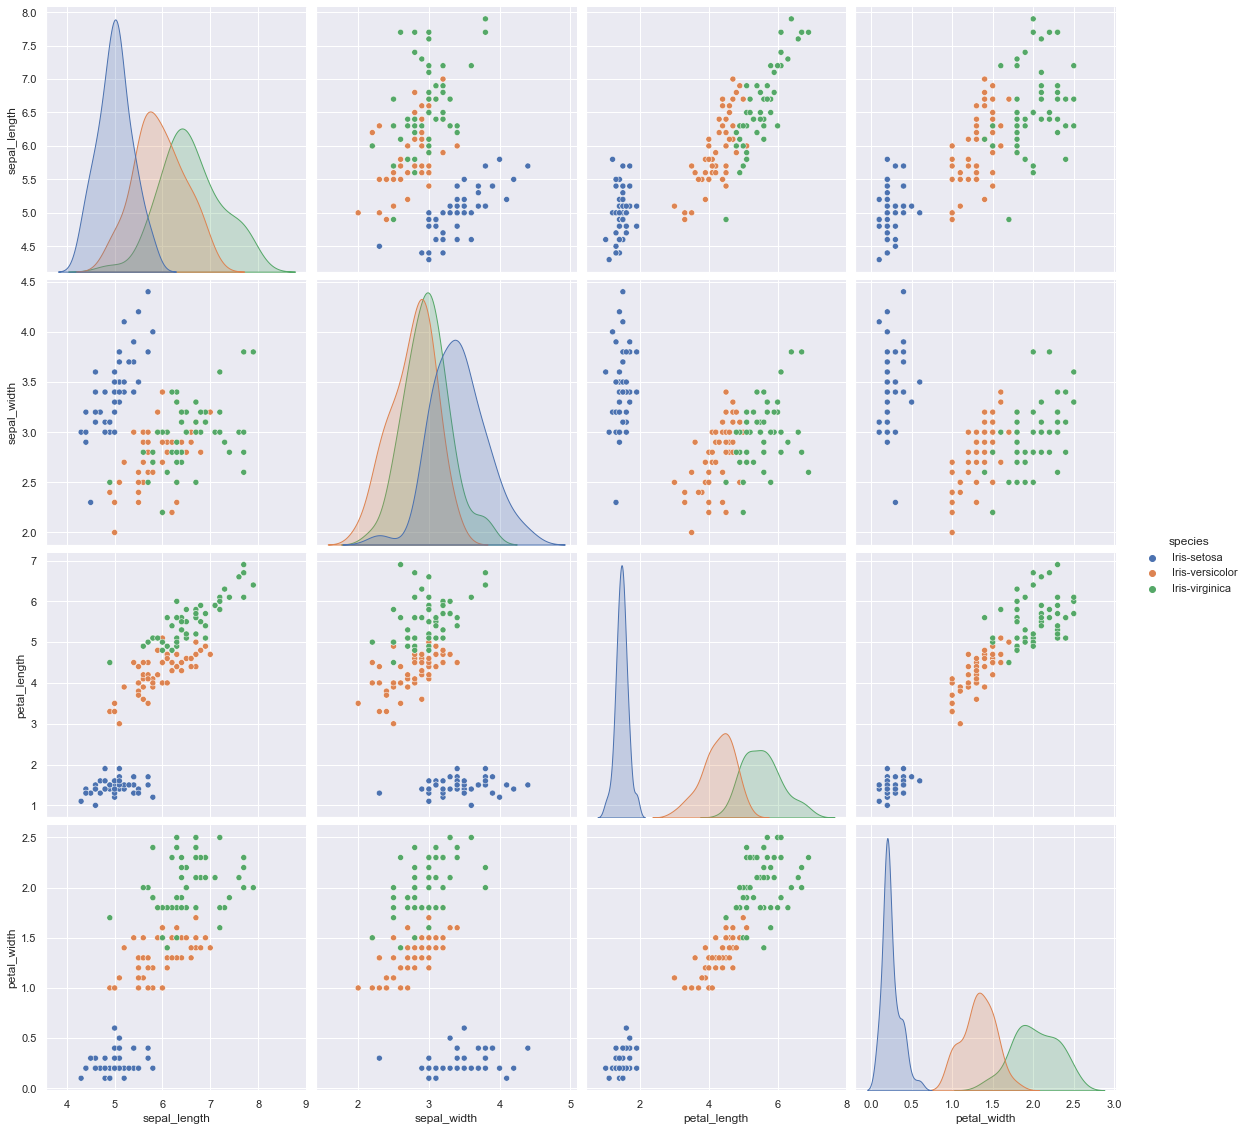

In [12]:
sns.pairplot(iris_data,hue="species",height=4)

**Observations:**  
1. High co relation betweeen petal length and widht columns. <br>
2. Setosa has both low petal length and width <br>
3. Versicolor has both average petal lenth and width <br>
4. Virginica has both high petal length and width. <br>
5. Sapel width for setosa is high and length is low. <br>
6. Versicolor have average values for for sapel dimensions. <br> 
7. Virginica has small width but large sapel length  <br>

## Co-relation matrix

[]

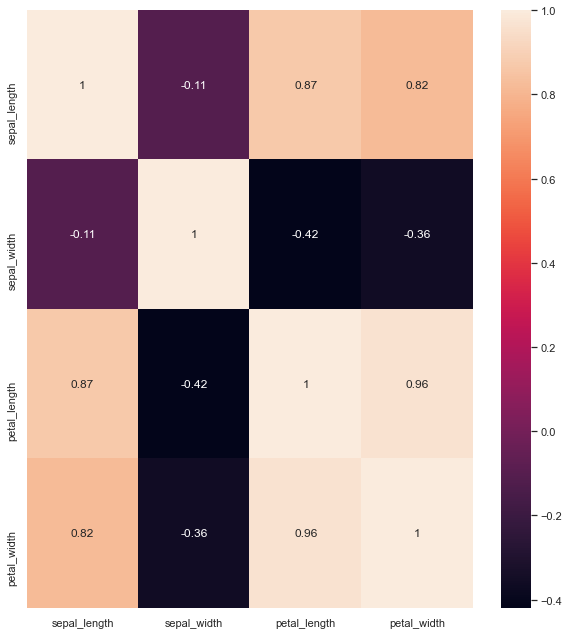

In [13]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

**Observations:** <br>
1. Sepal Length and Sepal Width features are slightly correlated with each other.

## Boxplot

Box plot divides the data into three quartiles and represents the minimum, maximum, median, first quartile and third quartile in the data set. It is also useful in comparing the distribution of data across data sets.

Here, it helps to check how well the samples of the species are distributed

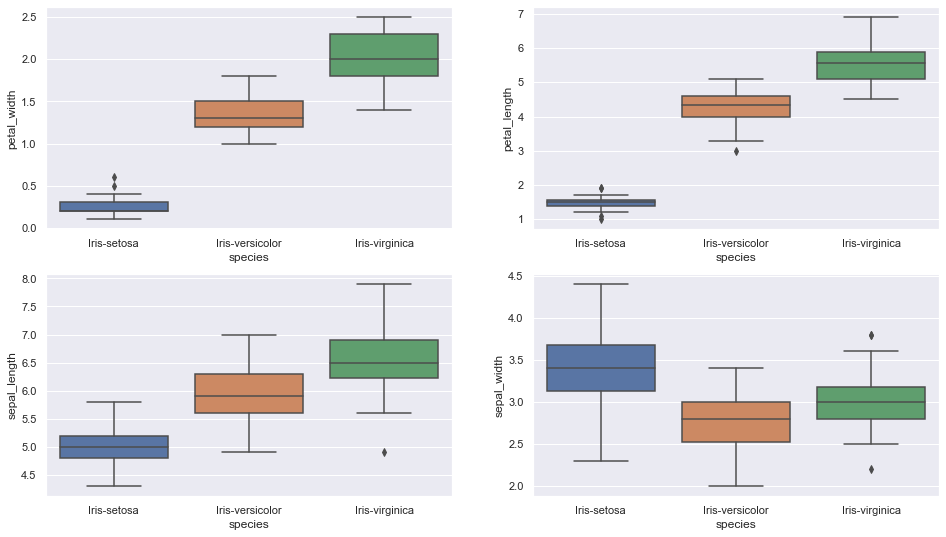

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=iris_data,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=iris_data,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=iris_data,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_width", x= "species", data=iris_data,  orient='v' , ax=axes[1, 1])
plt.show()

**Observations:**
1. Setosa is having smaller feature and less distributed <br>
2. Versicolor is distributed in a average manner and average features <br>
3. Virginica is highly distributed with large no .of values and features <br>

## Violin Plot

A violin plot is similar to a boxplot but looks like a violin and shows the distribution of the data for different categories. It shows the density of the data values at different points. 

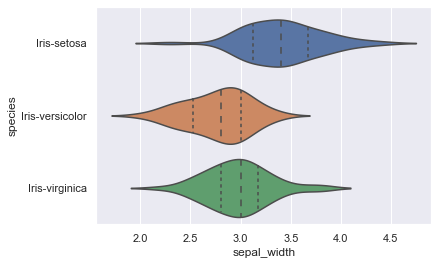

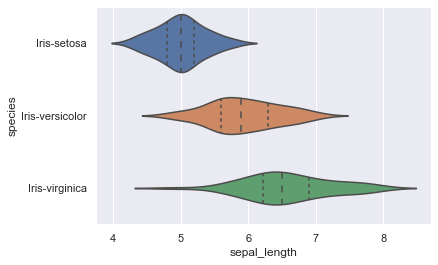

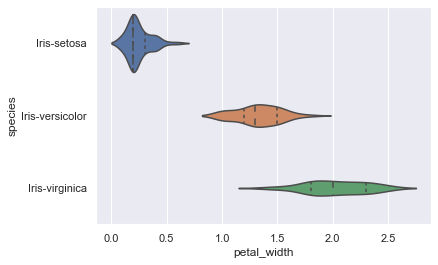

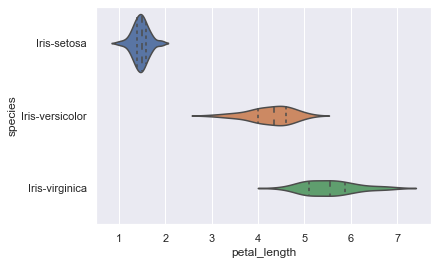

In [15]:
sns.violinplot(y='species', x='sepal_width', data=iris_data, inner='quartile')
plt.show() 
sns.violinplot(y='species', x='sepal_length', data=iris_data, inner='quartile')
plt.show() 
sns.violinplot(y='species', x='petal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=iris_data, inner='quartile')
plt.show()

Hence, the exploratory data analysis for iris flower dataset is concluded.